In [57]:
# pip install git+https://github.com/thinh-vu/vnstock.git@main

In [58]:
# !pip install -U vnstock3

In [59]:
from vnstock3 import Vnstock

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Select the Stock Symbol

In [61]:
stock = Vnstock().stock(symbol='HPG', source='VCI')

2024-08-29 20:07:12,148 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


# Measuring single year's operating performance
"We continue to feel that the **ratio of operating earnings** (before securities gains or losses) to shareholders’ equity 
with all **securities valued at cost** is the most appropriate way to measure any single year’s operating performance."  

-- Berkshire Letters 1979

### Extract Operating Earnings
Operating earnings, also known as operating income or operating profit, can be found on the income statement. It is usually calculated as:

Operating Earnings = Revenue − Operating Expenses

Operating expenses include costs such as cost of goods sold (COGS), selling, general and administrative expenses (SG&A), depreciation, and amortization.

In [62]:
IncomeStatement = stock.finance.income_statement(period='year')
# IncomeStatement = stock.finance.income_statement(period='year', lang='en')
# IncomeStatement = IncomeStatement.sort_index()
IncomeStatement.head(10)

,ticker,yearReport,Minority Interest,Minority Interest,Net Profit/Loss before tax,Dividends received,Dividends received,Provision for credit losses,Provision for credit losses,Revenue YoY (%),...,Net Other income/expenses,Total operating revenue,Operating Profit before Provision,Profit before tax,Tax For the Year,Business income tax - current,Business income tax - deferred,Net Profit For the Year,Attributable to parent company,EPS_basis
0,HPG,2023,0,-34676019275,7792728743173,0,0.0,0.0,-1094201952159,-0.157004,...,0.0,0.0,0.0,7792728743173,-992340428092,-1073551888059,81211459967,6800388315081,6835064334356,1117
1,HPG,2022,0,-39081499515,9922941127284,0,0.0,0.0,1010922330886,0.000000,...,0.0,0.0,0.0,9922941127284,-1478512072768,-1001020240086,-477491832682,8444429054516,8483510554031,1452
2,HPG,2021,0,42811733838,37056777714190,0,0.0,0.0,163177531627,0.652793,...,0.0,0.0,0.0,37056777714190,-2535822782892,-2855306347167,319483564275,34520954931298,34478143197460,7166
3,HPG,2020,0,55864004095,15356966791701,0,0.0,0.0,28314185442,0.411286,...,0.0,0.0,0.0,15356966791701,-1850802734794,-1784567843866,-66234890928,13506164056907,13450300052812,3846
4,HPG,2019,0,50805368355,9096662123386,0,0.0,0.0,-5772614376,0.143115,...,0.0,0.0,0.0,9096662123386,-1518413887157,-1603307926680,84894039523,7578248236229,7527442867874,2726
5,HPG,2018,0,27536495813,10071072872302,0,0.0,0.0,-72990493823,0.207569,...,0.0,0.0,0.0,10071072872302,-1470522166075,-1506320087551,35797921476,8600550706227,8573014210414,4037
6,HPG,2017,0,8084472201,9288369742697,0,0.0,0.0,-10870919019,0.382764,...,0.0,0.0,0.0,9288369742697,-1273613156649,-1317628785035,44015628386,8014756586048,8006672113847,5895
7,HPG,2016,0,4100726657,7701823953675,0,0.0,0.0,-113894221513,0.216057,...,0.0,0.0,0.0,7701823953675,-1095621226746,-1138489987447,42868760701,6606202726929,6602102000272,7162
8,HPG,2015,0,18919523530,3989828664796,0,0.0,0.0,65304349717,0.078971,...,0.0,0.0,0.0,3989828664796,-485446177017,-516978888313,31532711296,3504382487779,3485462964249,4517
9,HPG,2014,0,105961744233,3769520728432,0,NaN,NaN,209663586663,0.345042,...,NaN,NaN,NaN,3769520728432,-519306138228,-517116335811,-2189802417,3250214590204,3144252845971,4290


In [63]:
IncomeStatement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ticker                                                   11 non-null     object 
 1   yearReport                                               11 non-null     int64  
 2   Minority Interest                                        11 non-null     int64  
 3   Minority Interest                                        11 non-null     int64  
 4   Net Profit/Loss before tax                               11 non-null     int64  
 5   Dividends received                                       11 non-null     int64  
 6   Dividends received                                       9 non-null      float64
 7   Provision for credit losses                              9 non-null      float64
 8   Provision for credit losses     

In [64]:
# Get the column names and their non-null counts
column_info = IncomeStatement.isnull().sum().reset_index()
column_info.columns = ['Column', 'Null_Count']
column_info['Non_Null_Count'] = len(IncomeStatement) - column_info['Null_Count']

# Create a dictionary to store the column with the highest non-null count for each name
columns_to_keep = {}

for _, row in column_info.iterrows():
    col_name = row['Column']
    non_null_count = row['Non_Null_Count']
    
    if col_name not in columns_to_keep or non_null_count > columns_to_keep[col_name][1]:
        columns_to_keep[col_name] = (_, non_null_count)

# Get the indices of columns to keep
columns_to_keep_indices = [idx for idx, _ in columns_to_keep.values()]

# Keep only the columns with the highest non-null count for each name
IncomeStatement = IncomeStatement.iloc[:, columns_to_keep_indices]

# Reset the column names (optional, to remove any suffixes added by pandas for duplicate names)
IncomeStatement.columns = [col.split('.')[0] for col in IncomeStatement.columns]

In [65]:
IncomeStatement.columns

Index(['ticker', 'yearReport', 'Minority Interest',
       'Net Profit/Loss before tax', 'Dividends received',
       'Provision for credit losses', 'Revenue YoY (%)', 'Revenue (Bn',
       'Attribute to parent company (Bn',
       'Attribute to parent company YoY (%)', 'Financial Income',
       'Interest Expenses', 'Net Sales', 'Gross Profit', 'Financial Expenses',
       'General & Admin Expenses', 'Operating Profit/Loss',
       'Net income from associated companies', 'Other Income/Expenses',
       'Cost of Sales', 'Selling Expenses', 'Sales', 'Sales deductions',
       'Gain/(loss) from joint ventures', 'Other income',
       'Net other income/expenses', 'Interest and Similar Income',
       'Interest and Similar Expenses', 'Net Interest Income',
       'Fees and Comission Income', 'Fees and Comission Expenses',
       'Net Fee and Commission Income',
       'Net gain (loss) from foreign currency and gold dealings',
       'Net gain (loss) from trading of trading securities',
   

The **Operating Earnings** can be taken from the column 'Operating Profit/Loss'

In [66]:
IncomeStatement[['yearReport','Net Profit/Loss before tax','Gross Profit','Operating Profit/Loss','Operating Profit before Provision', 'Profit before tax','Net Profit For the Year','Revenue (Bn','Net Sales','Total operating revenue']]

,yearReport,Net Profit/Loss before tax,Gross Profit,Operating Profit/Loss,Operating Profit before Provision,Profit before tax,Net Profit For the Year,Revenue (Bn,Net Sales,Total operating revenue
0,2023,7792728743173,12937840695572,7650762789307,0.0,7792728743173,6800388315081,120355231616139,118953027893654,0.0
1,2022,9922941127284,16763426239552,9794030627309,0.0,9922941127284,8444429054516,142770810676858,141409274460632,0.0
2,2021,37056777714190,41108409532992,37008443446265,0.0,37056777714190,34520954931298,150865359967200,149679789979345,0.0
3,2020,15356966791701,18904049904154,15292303808992,0.0,15356966791701,13506164056907,91279041771826,90118503426717,0.0
4,2019,9096662123386,11185372222137,9030979639207,0.0,9096662123386,7578248236229,64677906575644,63658192673791,0.0
5,2018,10071072872302,11670832231074,10072089132832,0.0,10071072872302,8600550706227,56580423695083,55836458379759,0.0
6,2017,9288369742697,10625571036083,9252124280568,0.0,9288369742697,8014756586048,46854825722466,46161691614304,0.0
7,2016,7701823953675,8750559721002,7684677856132,0.0,7701823953675,6606202726929,33884892008435,33283210159987,0.0
8,2015,3989828664796,5593975946520,4091186171151,0.0,3989828664796,3504382487779,27864558436964,27452932114333,0.0
9,2014,3769520728432,5187002283034,3809982440777,NaN,3769520728432,3250214590204,25825123626163,25525348822713,NaN


Extract Shareholders' Equity

In [67]:
BalanceSheet = stock.finance.balance_sheet(period='year')
# IncomeStatement = stock.finance.income_statement(period='year', lang='en')
# IncomeStatement = IncomeStatement.sort_index()
BalanceSheet.head(10)

,ticker,yearReport,Net Inventories,Other current assets,Investment in properties,Other non-current assets,Other Reserves,Other Reserves,Budget sources and other funds,Budget sources and other funds,...,LIABILITIES (Bn. VND),TOTAL ASSETS (Bn. VND),Good will (Bn. VND),Long-term prepayments (Bn. VND),Other long-term assets (Bn. VND),Long-term investments (Bn. VND),Fixed assets (Bn. VND),Other long-term receivables (Bn. VND),Long-term loans receivables (Bn. VND),Long-term trade receivables (Bn. VND)
0,HPG,2023,34504487406261,3080510663421,593920277320,4454004867718,0,0,0,0,...,84946167324422,187782586563801,75909018692,4215007972679,0,40000000000,71998370737871,781079548004,95351026613,1880922130348
1,HPG,2022,34491111096123,1537894659443,629111776960,4100323979117,0,0,0,0,...,74222579892349,170335519508132,88008959996,3929243956403,700000000,700000000,70832915657865,792790894665,101693561714,894484456379
2,HPG,2021,42134493932210,3650156741241,548210755123,3737859869519,0,0,0,0,...,87455796846810,178236422358249,37121950665,3171382188206,700000000,6715955617,69280841784004,690833578689,118401369280,809234947969
3,HPG,2020,26286822229202,2512553533909,564296973801,1914757777153,0,0,0,0,...,72291648082726,131511434388837,43109950665,1646094518464,700000000,171085206311,65561657180137,209158308631,96007238800,305165547431
4,HPG,2019,19411922748095,1544376365997,576616510917,2004150482489,0,0,0,0,...,53989393956205,101776030099900,61185171517,1650738623090,700000000,45794216642,31249493917960,22807248984,4910346000,27717594984
5,HPG,2018,14115139048908,1743127683967,179740530488,1755774089572,0,0,0,0,...,37600057830115,78223007670925,88234324237,1461311868435,700000000,66584926457,12782560625001,22301804672,0,22301804672
6,HPG,2017,11748873281675,562419250596,191191085236,1057622949461,0,0,0,0,...,20624604566341,53022184778251,54405476957,832464153214,15700000000,16951738400,13197796695351,21810530536,0,21810530536
7,HPG,2016,10247175680697,288621019303,202756917580,918531319407,0,0,0,0,...,13376291239921,33226552317885,74833965963,716374249275,15702128365,78864136876,12670459873438,15673189031,2500000000,18173189031
8,HPG,2015,6937441787064,238662107634,192494292820,726477135665,0,0,0,0,...,11040058800235,25506769185545,91091275203,551682828680,15702128365,102545479270,8211430447399,11485258954,5000000000,16485258954
9,HPG,2014,7386389048165,103516099297,197343763931,917366261264,0,0,0,0,...,10123764654194,22089104397803,382082082487,483218729903,15702128365,61184828523,8728652459845,9225561499,0,9225561499


In [68]:
print(list(BalanceSheet.columns.values))

['ticker', 'yearReport', 'Net Inventories', 'Other current assets', 'Investment in properties', 'Other non-current assets', 'Other Reserves', 'Other Reserves', 'Budget sources and other funds', 'Budget sources and other funds', 'MINORITY INTERESTS', 'Goodwill', 'Balances with the SBV', 'Placements with and loans to other credit institutions', 'Trading Securities, net', 'Trading Securities', 'Provision for diminution in value of Trading Securities', 'Derivatives and other financial liabilities', 'Derivatives and other financial liabilities', 'Loans and advances to customers, net', 'Loans and advances to customers', 'Less: Provision for losses on loans and advances to customers', 'Investment Securities', 'Available-for Sales Securities', 'Held-to-Maturity Securities', 'Less: Provision for diminution in value of investment securities', 'Investment in joint ventures', 'Investments in associate companies', 'Less: Provision for diminuation in value of long term investments', 'Tangible fixed 

In [69]:
BalanceSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 75 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   ticker                                                             11 non-null     object 
 1   yearReport                                                         11 non-null     int64  
 2   Net Inventories                                                    11 non-null     int64  
 3   Other current assets                                               11 non-null     int64  
 4   Investment in properties                                           11 non-null     int64  
 5   Other non-current assets                                           11 non-null     int64  
 6   Other Reserves                                                     11 non-null     int64  
 7   Other Reserves              

In [70]:
BalanceSheet[['yearReport',"OWNER'S EQUITY(Bn.VND)"]]

,yearReport,OWNER'S EQUITY(Bn.VND)
0,2023,102836419239379
1,2022,96112939615783
2,2021,90780625511439
3,2020,59219786306111
4,2019,47786636143695
5,2018,40622949840810
6,2017,32397580211910
7,2016,19850261077964
8,2015,14466710385310
9,2014,11965339743609


In [71]:
CashFlow = stock.finance.cash_flow(period='year')
# IncomeStatement = stock.finance.income_statement(period='year', lang='en')
# IncomeStatement = IncomeStatement.sort_index()
CashFlow.head(10)

,ticker,yearReport,Cash and cash equivalents,Unrealized foreign exchange gain/loss,Profit/Loss from disposal of fixed assets,Profit/Loss from disposal of fixed assets,Profit/Loss from investing activities,Interest Expense,Interest income and dividends,Increase/Decrease in receivables,...,Operating profit before changes in working capital,Net Cash Flows from Operating Activities before BIT,Payment from reserves,Purchase of fixed assets,Gain on Dividend,Net Cash Flows from Investing Activities,Increase in charter captial,Cash flows from financial activities,"Collection of loans, proceeds from sales of debts instruments (Bn. VND)","Loans granted, purchases of debt instruments (Bn. VND)"
0,HPG,2023,8324588920227,291243752578,0,0.0,-1927836792719,3585077683881,0,0.0,...,15421044915455,0.0,0.0,-17373946475964,2222218737225,-11995089522267,700000000,7275612340772,43279753995632,-39803522821759
1,HPG,2022,22471375562130,333983153559,0,0.0,-1832298259730,3083638131818,0,0.0,...,19291327380767,0.0,0.0,-17887504647036,1697815926948,-24626212744553,4075000000,-1777989694690,47412529370171,-55505793882381
2,HPG,2021,13696099298228,41938831417,0,0.0,-1661082595981,2525823258237,0,0.0,...,44209139034907,0.0,0.0,-11621470092371,1053915562539,-19669452763006,10630000000,1740105149956,31076412522291,-41061488333969
3,HPG,2020,4544900252204,52078870772,0,0.0,-490559694590,2191680923417,0,0.0,...,21932338018863,0.0,0.0,-11915645555048,353560779277,-18495398244903,2700000000,16053701595253,5003441426581,-11971173251594
4,HPG,2019,2515617135457,24183514856,0,0.0,-286185193464,936710218359,0,0.0,...,12358830621790,0.0,0.0,-20825371574660,369546551545,-18064216043257,85000000,12377940956305,6832224480334,-4467553072509
5,HPG,2018,4264641954689,29910869480,0,0.0,-112985971103,539861243640,0,0.0,...,12740513971484,0.0,0.0,-27594117760420,946999021433,-20533133970944,11424719202,11142511642260,17443013202984,-11295502021543
6,HPG,2017,4558660713745,-4721135461,0,0.0,-100141408999,479707569855,0,0.0,...,11657000558337,0.0,0.0,-8875037848448,164530335333,-17925765126837,5057285360000,11573693101481,4461988265600,-13644057693450
7,HPG,2016,2372761840865,22123664306,0,NaN,-142785039051,279951879407,0,NaN,...,9421546042999,0.0,0.0,-3416965133077,0,-3128134914080,10000000,-1504806336248,271604227038,-10561686300
8,HPG,2015,2026280467705,13166497767,0,NaN,-81208667361,251337896345,0,NaN,...,5811010811952,0.0,0.0,-3386572345633,0,-3763774366325,58500000,-432809044847,119070843886,-298004536121
9,HPG,2014,2125322390697,82549401774,0,NaN,-23625391281,350628944467,0,NaN,...,5743142484326,NaN,NaN,-1165028194450,107306447497,-1250083322879,475000000,-1611348733435,0,-158593682578


In [72]:
CashFlow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 43 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   ticker                                                                   11 non-null     object 
 1   yearReport                                                               11 non-null     int64  
 2   Cash and cash equivalents                                                11 non-null     int64  
 3   Unrealized foreign exchange gain/loss                                    11 non-null     int64  
 4   Profit/Loss from disposal of fixed assets                                11 non-null     int64  
 5   Profit/Loss from disposal of fixed assets                                8 non-null      float64
 6   Profit/Loss from investing activities                                    11 

In [73]:
CashFlow[['yearReport', 'Dividends paid','Net cash inflows/outflows from operating activities']]

,yearReport,Dividends paid,Net cash inflows/outflows from operating activities
0,2023,-8013794632,8643030777026
1,2022,-2261459543241,12277636676507
2,2021,-1693086647969,26720913303108
3,2020,-1419473748756,11587249912974
4,2019,-12646859136,7715168694116
5,2018,-5918198429,7642344150731
6,2017,-3754507141,6058322352370
7,2016,-1102410958562,6818719926848
8,2015,-540720414633,4542949540971
9,2014,-681451419825,2762273318349


In [74]:
growth_numbers = pd.merge(IncomeStatement[['yearReport','Operating Profit/Loss','Net Sales','Gross Profit']],
                          BalanceSheet[['yearReport',"OWNER'S EQUITY(Bn.VND)","LIABILITIES (Bn. VND)"]], how='inner', on='yearReport')

growth_numbers = pd.merge(growth_numbers, CashFlow[['yearReport', 'Dividends paid','Net cash inflows/outflows from operating activities']],
                          how='inner', on='yearReport')

growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities
0,2023,7650762789307,118953027893654,12937840695572,102836419239379,84946167324422,-8013794632,8643030777026
1,2022,9794030627309,141409274460632,16763426239552,96112939615783,74222579892349,-2261459543241,12277636676507
2,2021,37008443446265,149679789979345,41108409532992,90780625511439,87455796846810,-1693086647969,26720913303108
3,2020,15292303808992,90118503426717,18904049904154,59219786306111,72291648082726,-1419473748756,11587249912974
4,2019,9030979639207,63658192673791,11185372222137,47786636143695,53989393956205,-12646859136,7715168694116
5,2018,10072089132832,55836458379759,11670832231074,40622949840810,37600057830115,-5918198429,7642344150731
6,2017,9252124280568,46161691614304,10625571036083,32397580211910,20624604566341,-3754507141,6058322352370
7,2016,7684677856132,33283210159987,8750559721002,19850261077964,13376291239921,-1102410958562,6818719926848
8,2015,4091186171151,27452932114333,5593975946520,14466710385310,11040058800235,-540720414633,4542949540971
9,2014,3809982440777,25525348822713,5187002283034,11965339743609,10123764654194,-681451419825,2762273318349


In [75]:
growth_numbers['Dividends paid'] = growth_numbers['Dividends paid'].abs()

growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities
0,2023,7650762789307,118953027893654,12937840695572,102836419239379,84946167324422,8013794632,8643030777026
1,2022,9794030627309,141409274460632,16763426239552,96112939615783,74222579892349,2261459543241,12277636676507
2,2021,37008443446265,149679789979345,41108409532992,90780625511439,87455796846810,1693086647969,26720913303108
3,2020,15292303808992,90118503426717,18904049904154,59219786306111,72291648082726,1419473748756,11587249912974
4,2019,9030979639207,63658192673791,11185372222137,47786636143695,53989393956205,12646859136,7715168694116
5,2018,10072089132832,55836458379759,11670832231074,40622949840810,37600057830115,5918198429,7642344150731
6,2017,9252124280568,46161691614304,10625571036083,32397580211910,20624604566341,3754507141,6058322352370
7,2016,7684677856132,33283210159987,8750559721002,19850261077964,13376291239921,1102410958562,6818719926848
8,2015,4091186171151,27452932114333,5593975946520,14466710385310,11040058800235,540720414633,4542949540971
9,2014,3809982440777,25525348822713,5187002283034,11965339743609,10123764654194,681451419825,2762273318349


In [76]:
growth_numbers["Equity"] = growth_numbers["OWNER'S EQUITY(Bn.VND)"]
growth_numbers['Operating Ratio'] = growth_numbers['Operating Profit/Loss'] / growth_numbers['Equity']
growth_numbers['Operating Ratio'] = growth_numbers['Operating Ratio'].round(2)
growth_numbers["Operating Cash"] = growth_numbers["Net cash inflows/outflows from operating activities"]

growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities,Equity,Operating Ratio,Operating Cash
0,2023,7650762789307,118953027893654,12937840695572,102836419239379,84946167324422,8013794632,8643030777026,102836419239379,0.07,8643030777026
1,2022,9794030627309,141409274460632,16763426239552,96112939615783,74222579892349,2261459543241,12277636676507,96112939615783,0.10,12277636676507
2,2021,37008443446265,149679789979345,41108409532992,90780625511439,87455796846810,1693086647969,26720913303108,90780625511439,0.41,26720913303108
3,2020,15292303808992,90118503426717,18904049904154,59219786306111,72291648082726,1419473748756,11587249912974,59219786306111,0.26,11587249912974
4,2019,9030979639207,63658192673791,11185372222137,47786636143695,53989393956205,12646859136,7715168694116,47786636143695,0.19,7715168694116
5,2018,10072089132832,55836458379759,11670832231074,40622949840810,37600057830115,5918198429,7642344150731,40622949840810,0.25,7642344150731
6,2017,9252124280568,46161691614304,10625571036083,32397580211910,20624604566341,3754507141,6058322352370,32397580211910,0.29,6058322352370
7,2016,7684677856132,33283210159987,8750559721002,19850261077964,13376291239921,1102410958562,6818719926848,19850261077964,0.39,6818719926848
8,2015,4091186171151,27452932114333,5593975946520,14466710385310,11040058800235,540720414633,4542949540971,14466710385310,0.28,4542949540971
9,2014,3809982440777,25525348822713,5187002283034,11965339743609,10123764654194,681451419825,2762273318349,11965339743609,0.32,2762273318349


In [77]:
# Calculate the growth rate for each column (except for the 'yearReport' column)
growth_rate = growth_numbers.sort_values(by="yearReport").set_index('yearReport').pct_change().reset_index()

# Convert growth rates to percentage form
growth_rate.iloc[:,1:] = growth_rate.iloc[:,1:] * 100
# growth_rate['yearReport'] = int(growth_rate['yearReport']/100)

# Rename columns to indicate they contain growth rates
growth_rate.columns = ['yearReport'] + [f'{col} Growth Rate (%)' for col in growth_rate.columns if col != 'yearReport']

# Display the growth rates
growth_rate

,yearReport,Operating Profit/Loss Growth Rate (%),Net Sales Growth Rate (%),Gross Profit Growth Rate (%),OWNER'S EQUITY(Bn.VND) Growth Rate (%),LIABILITIES (Bn. VND) Growth Rate (%),Dividends paid Growth Rate (%),Net cash inflows/outflows from operating activities Growth Rate (%),Equity Growth Rate (%),Operating Ratio Growth Rate (%),Operating Cash Growth Rate (%)
0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,61.317343,34.810156,57.959646,25.946606,-24.950322,62.058886,-14.582059,25.946606,28.000000,-14.582059
2,2015,7.380709,7.551643,7.846028,20.905137,9.050923,-20.651656,64.464158,20.905137,-12.500000,64.464158
3,2016,87.834959,21.237360,56.428269,37.213372,21.161413,103.878183,50.094556,37.213372,39.285714,50.094556
4,2017,20.397035,38.693628,21.427330,63.209844,54.187765,-99.659428,-11.151618,63.209844,-25.641026,-11.151618
5,2018,8.862450,20.958432,9.837224,25.388839,82.306806,57.629170,26.146212,25.388839,-13.793103,26.146212
6,2019,-10.336579,14.008292,-4.159601,17.634579,43.588593,113.694409,0.952908,17.634579,-24.000000,0.952908
7,2020,69.331617,41.566230,69.006892,23.925413,33.899721,11123.923138,50.187901,23.925413,36.842105,50.187901
8,2021,142.006985,66.092183,117.458215,53.294416,20.976350,19.275658,130.606171,53.294416,57.692308,130.606171
9,2022,-73.535686,-5.525472,-59.221419,5.873846,-15.131321,33.570219,-54.052331,5.873846,-75.609756,-54.052331


### The Big 4 Numbers that you'd like to see grow each year at least 10%
<ul>
    <li>Net Income or Operating Earnings</li>
    <li>Equity & Dividends</li>
    <li>Sales</li>
    <li>Operating Cash</li>
</ul>


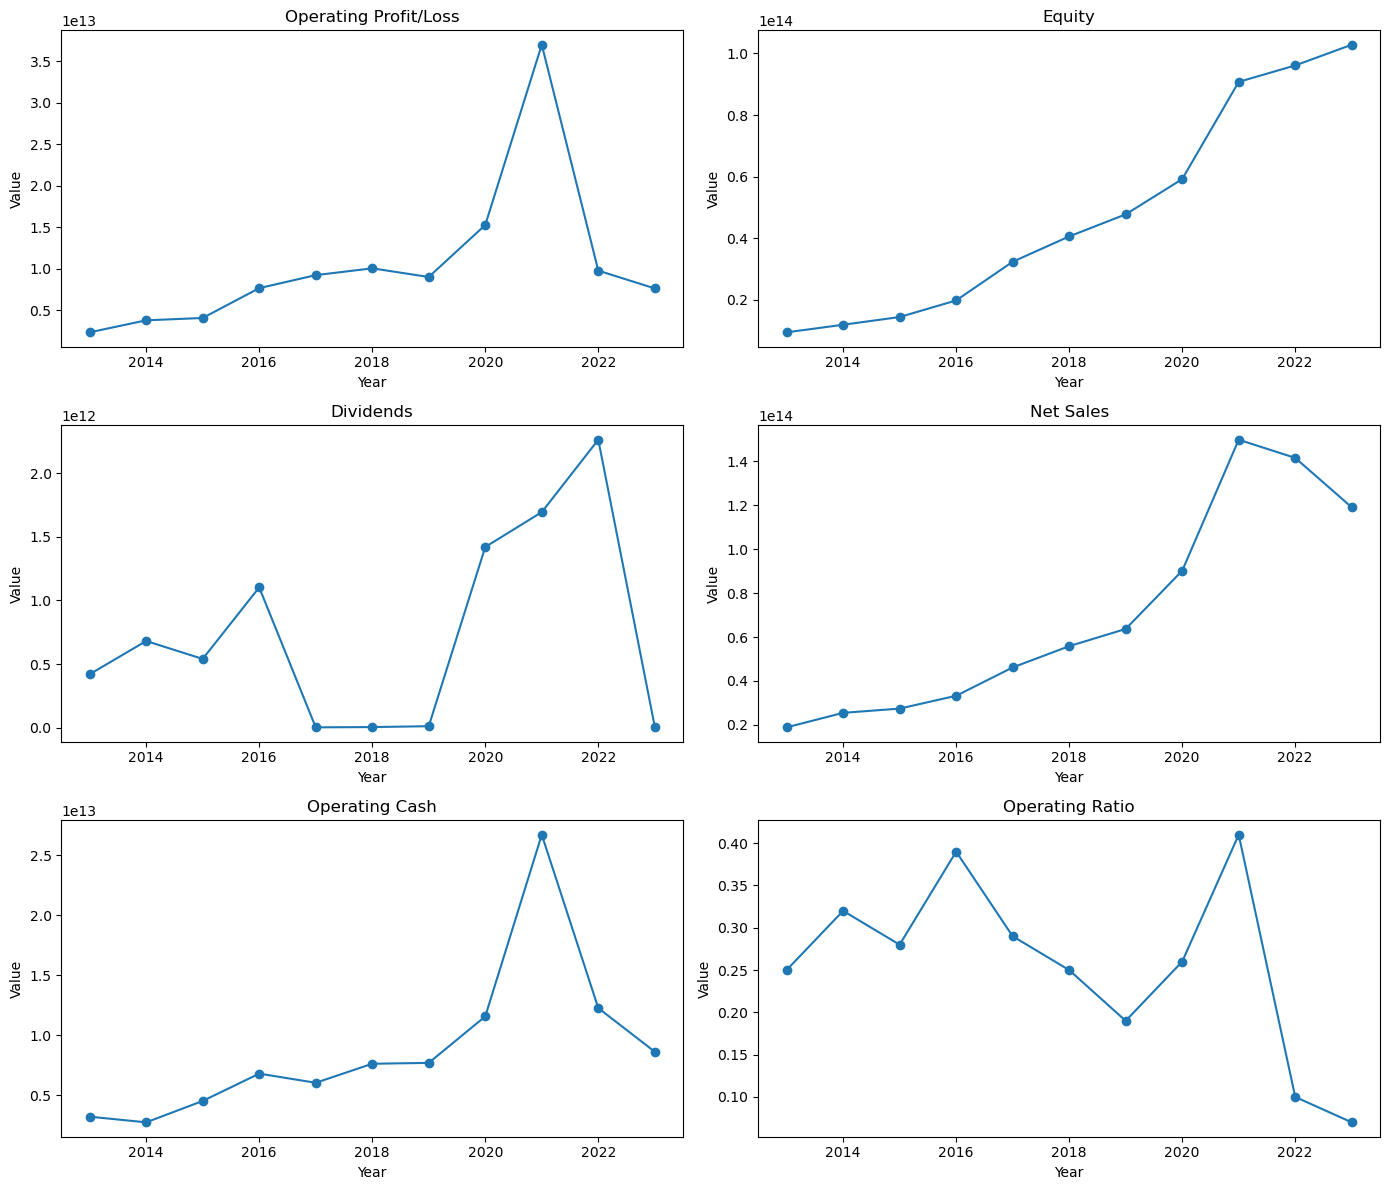

In [78]:
# Create DataFrame

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 columns of subplots

# Plot Operating Profit/Loss
axs[0, 0].plot(growth_numbers['yearReport'], growth_numbers['Operating Profit/Loss'], marker='o')
axs[0, 0].set_title('Operating Profit/Loss')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Value')

# Plot Equity
axs[0, 1].plot(growth_numbers['yearReport'], growth_numbers['Equity'], marker='o')
axs[0, 1].set_title('Equity')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')

# Plot Dividend
axs[1, 0].plot(growth_numbers['yearReport'], growth_numbers['Dividends paid'], marker='o')
axs[1, 0].set_title('Dividends')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')

# Plot Net Sales
axs[1, 1].plot(growth_numbers['yearReport'], growth_numbers['Net Sales'], marker='o')
axs[1, 1].set_title('Net Sales')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Value')

# Plot Gross Profit
axs[2, 0].plot(growth_numbers['yearReport'], growth_numbers['Operating Cash'], marker='o')
axs[2, 0].set_title('Operating Cash')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Value')


# Plot Operating Ratio
axs[2, 1].plot(growth_numbers['yearReport'], growth_numbers['Operating Ratio'], marker='o')
axs[2, 1].set_title('Operating Ratio')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Value')

# Hide the last subplot (bottom-right corner) if not needed
# fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [79]:
growth_numbers.tail()

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities,Equity,Operating Ratio,Operating Cash
6,2017,9252124280568,46161691614304,10625571036083,32397580211910,20624604566341,3754507141,6058322352370,32397580211910,0.29,6058322352370
7,2016,7684677856132,33283210159987,8750559721002,19850261077964,13376291239921,1102410958562,6818719926848,19850261077964,0.39,6818719926848
8,2015,4091186171151,27452932114333,5593975946520,14466710385310,11040058800235,540720414633,4542949540971,14466710385310,0.28,4542949540971
9,2014,3809982440777,25525348822713,5187002283034,11965339743609,10123764654194,681451419825,2762273318349,11965339743609,0.32,2762273318349
10,2013,2361793457152,18934292150531,3283751514327,9500327254417,13489417843130,420496176570,3233832714220,9500327254417,0.25,3233832714220


In [80]:
growth_rate

,yearReport,Operating Profit/Loss Growth Rate (%),Net Sales Growth Rate (%),Gross Profit Growth Rate (%),OWNER'S EQUITY(Bn.VND) Growth Rate (%),LIABILITIES (Bn. VND) Growth Rate (%),Dividends paid Growth Rate (%),Net cash inflows/outflows from operating activities Growth Rate (%),Equity Growth Rate (%),Operating Ratio Growth Rate (%),Operating Cash Growth Rate (%)
0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,61.317343,34.810156,57.959646,25.946606,-24.950322,62.058886,-14.582059,25.946606,28.000000,-14.582059
2,2015,7.380709,7.551643,7.846028,20.905137,9.050923,-20.651656,64.464158,20.905137,-12.500000,64.464158
3,2016,87.834959,21.237360,56.428269,37.213372,21.161413,103.878183,50.094556,37.213372,39.285714,50.094556
4,2017,20.397035,38.693628,21.427330,63.209844,54.187765,-99.659428,-11.151618,63.209844,-25.641026,-11.151618
5,2018,8.862450,20.958432,9.837224,25.388839,82.306806,57.629170,26.146212,25.388839,-13.793103,26.146212
6,2019,-10.336579,14.008292,-4.159601,17.634579,43.588593,113.694409,0.952908,17.634579,-24.000000,0.952908
7,2020,69.331617,41.566230,69.006892,23.925413,33.899721,11123.923138,50.187901,23.925413,36.842105,50.187901
8,2021,142.006985,66.092183,117.458215,53.294416,20.976350,19.275658,130.606171,53.294416,57.692308,130.606171
9,2022,-73.535686,-5.525472,-59.221419,5.873846,-15.131321,33.570219,-54.052331,5.873846,-75.609756,-54.052331


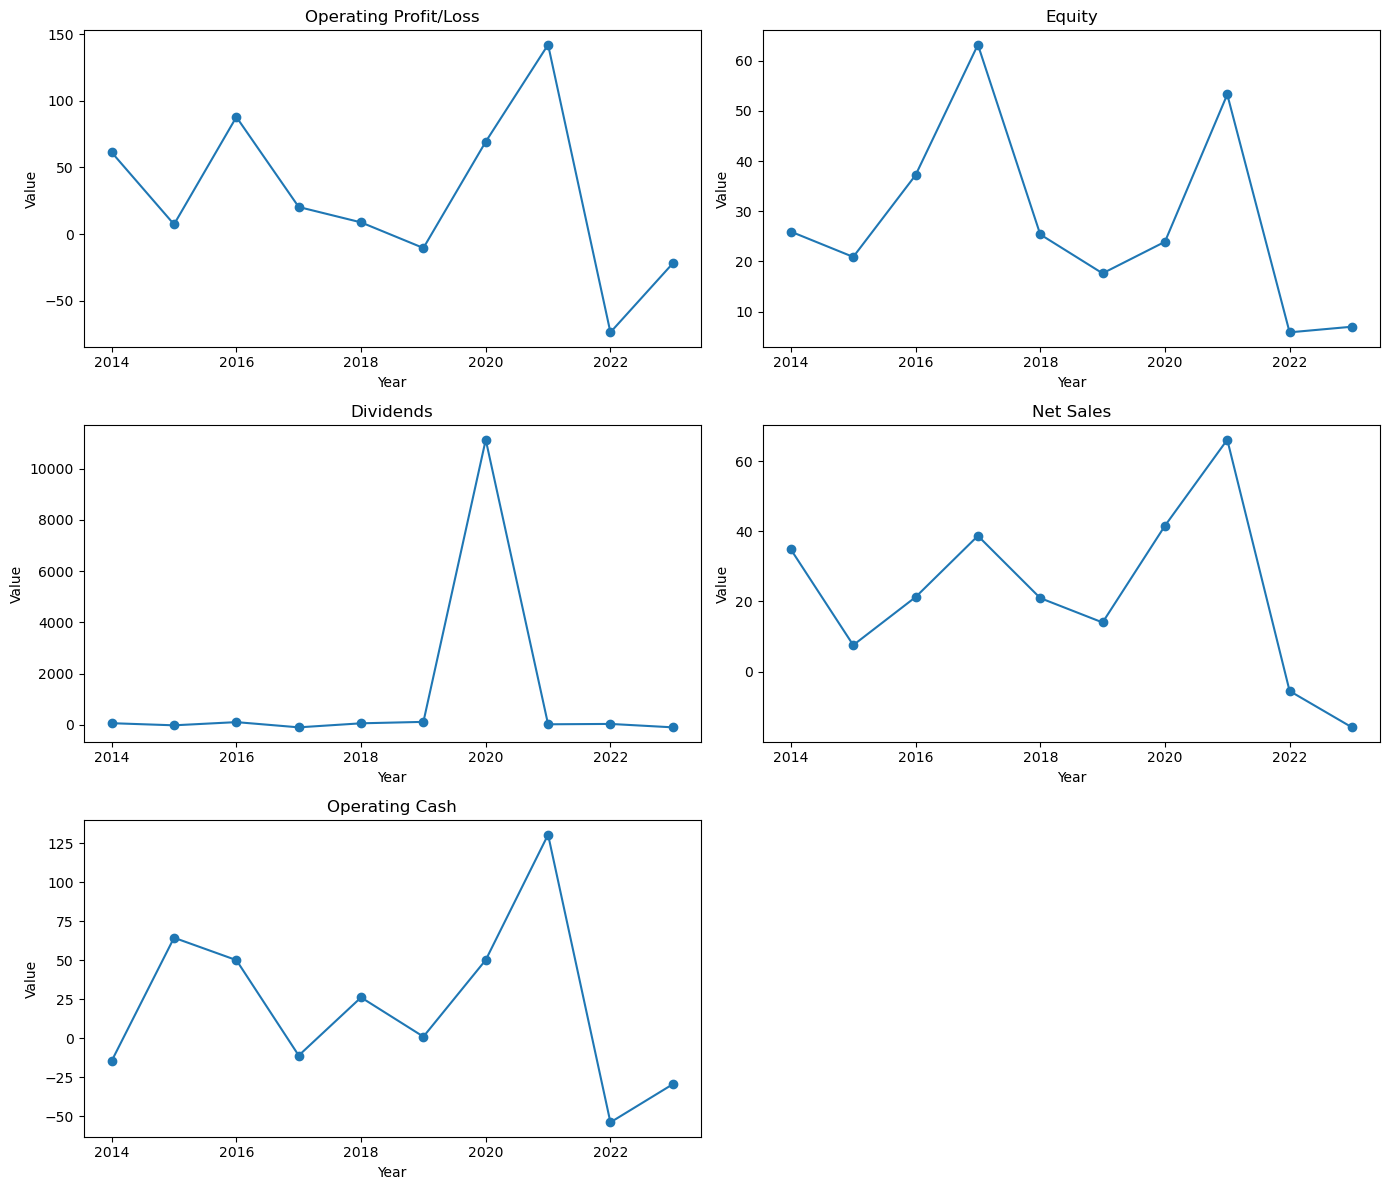

In [81]:
# Plot the Growth Rate of each number
# growth_rate = growth_rate[growth_rate['yearReport'] >= 2015]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 columns of subplots

# Plot Operating Profit/Loss
axs[0, 0].plot(growth_rate['yearReport'], growth_rate['Operating Profit/Loss Growth Rate (%)'], marker='o')
axs[0, 0].set_title('Operating Profit/Loss')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Value')

# Plot Equity
axs[0, 1].plot(growth_rate['yearReport'], growth_rate['Equity Growth Rate (%)'], marker='o')
axs[0, 1].set_title('Equity')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')

# Plot Dividend
axs[1, 0].plot(growth_rate['yearReport'], growth_rate['Dividends paid Growth Rate (%)'], marker='o')
axs[1, 0].set_title('Dividends')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')

# Plot Net Sales
axs[1, 1].plot(growth_rate['yearReport'], growth_rate['Net Sales Growth Rate (%)'], marker='o')
axs[1, 1].set_title('Net Sales')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Value')

# Plot Gross Profit
axs[2, 0].plot(growth_rate['yearReport'], growth_rate['Operating Cash Growth Rate (%)'], marker='o')
axs[2, 0].set_title('Operating Cash')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Value')



# Hide the last subplot (bottom-right corner) if not needed
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Management Numbers

In [82]:
growth_numbers

,yearReport,Operating Profit/Loss,Net Sales,Gross Profit,OWNER'S EQUITY(Bn.VND),LIABILITIES (Bn. VND),Dividends paid,Net cash inflows/outflows from operating activities,Equity,Operating Ratio,Operating Cash
0,2023,7650762789307,118953027893654,12937840695572,102836419239379,84946167324422,8013794632,8643030777026,102836419239379,0.07,8643030777026
1,2022,9794030627309,141409274460632,16763426239552,96112939615783,74222579892349,2261459543241,12277636676507,96112939615783,0.10,12277636676507
2,2021,37008443446265,149679789979345,41108409532992,90780625511439,87455796846810,1693086647969,26720913303108,90780625511439,0.41,26720913303108
3,2020,15292303808992,90118503426717,18904049904154,59219786306111,72291648082726,1419473748756,11587249912974,59219786306111,0.26,11587249912974
4,2019,9030979639207,63658192673791,11185372222137,47786636143695,53989393956205,12646859136,7715168694116,47786636143695,0.19,7715168694116
5,2018,10072089132832,55836458379759,11670832231074,40622949840810,37600057830115,5918198429,7642344150731,40622949840810,0.25,7642344150731
6,2017,9252124280568,46161691614304,10625571036083,32397580211910,20624604566341,3754507141,6058322352370,32397580211910,0.29,6058322352370
7,2016,7684677856132,33283210159987,8750559721002,19850261077964,13376291239921,1102410958562,6818719926848,19850261077964,0.39,6818719926848
8,2015,4091186171151,27452932114333,5593975946520,14466710385310,11040058800235,540720414633,4542949540971,14466710385310,0.28,4542949540971
9,2014,3809982440777,25525348822713,5187002283034,11965339743609,10123764654194,681451419825,2762273318349,11965339743609,0.32,2762273318349


In [83]:
management_numbers = growth_numbers[['yearReport']].copy()
management_numbers['ROE'] = (growth_numbers['Operating Profit/Loss'] / growth_numbers['Equity']).round(2)
management_numbers['ROIC'] = (growth_numbers['Operating Profit/Loss'] / growth_numbers['LIABILITIES (Bn. VND)']).round(2)

management_numbers

,yearReport,ROE,ROIC
0,2023,0.07,0.09
1,2022,0.10,0.13
2,2021,0.41,0.42
3,2020,0.26,0.21
4,2019,0.19,0.17
5,2018,0.25,0.27
6,2017,0.29,0.45
7,2016,0.39,0.57
8,2015,0.28,0.37
9,2014,0.32,0.38


Calculate the CAGR of the 4 numbers

In [84]:
#List of financial metrics to calculate the CAGR
metrics = ['Operating Profit/Loss','Equity','Net Sales','Operating Cash']

#Calculate the CAGR for each metrics
CAGRS = {}

for metric in metrics:
    #Find the first and last non-null values:
    first_non_null = growth_numbers[metric].loc[growth_numbers[metric] > 0].first_valid_index()
    last_non_null = growth_numbers[metric].last_valid_index()

    if first_non_null is not None and last_non_null is not None:
        #Calculate the number of years in which the value is not null
        num_years = int(last_non_null) - int(first_non_null) + 1
        initial_value = growth_numbers[metric][first_non_null]
        lastest_value = growth_numbers[metric][last_non_null]
    print(initial_value)
    print(lastest_value)


7650762789307
2361793457152
102836419239379
9500327254417
118953027893654
18934292150531
8643030777026
3233832714220


In [85]:
#List of financial metrics to calculate the CAGR
metrics = ['Operating Profit/Loss','Equity','Net Sales','Operating Cash']

#Calculate the CAGR for each metrics
CAGRS = {}

for metric in metrics:
    #Find the first and last non-null values:
    first_non_null = growth_numbers[metric].loc[growth_numbers[metric] > 0].first_valid_index()
    last_non_null = growth_numbers[metric].last_valid_index()

    if first_non_null is not None and last_non_null is not None:
        #Calculate the number of years in which the value is not null
        num_years = abs(int(last_non_null) - int(first_non_null) + 1)
        initial_value = growth_numbers[metric][last_non_null]
        lastest_value = growth_numbers[metric][first_non_null]
        
        
        CAGR = (((lastest_value/initial_value) ** (1/num_years)) - 1) * 100

        #Store the CAGR and the num_years in the CAGRS dictionary
        CAGRS[metric] = {'cagr': CAGR, 'num_years': num_years}

#Print CAGR for each metric
for metric, values in CAGRS.items():
    cagr = values['cagr']
    num_years = values['num_years']
    print(f'CAGR of {metric}: {cagr: .2f}% over {num_years} years.')


# for metric in metrics:
#     initial_value = full_df[metric].dropna().loc[full_df[metric] > 0].iloc[0] #Find the first non null value
#     lastest_value = full_df[metric].iloc[-1]

#     lastest_year = int(full_df[metric].last_valid_index())
#     first_year = int(full_df[metric].first_valid_index())
#     print (f'{metric}: {first_year}, {lastest_year}')



CAGR of Operating Profit/Loss:  11.28% over 11 years.
CAGR of Equity:  24.18% over 11 years.
CAGR of Net Sales:  18.18% over 11 years.
CAGR of Operating Cash:  9.35% over 11 years.


In [86]:
CAGR = (((1006891945310/76356700441) ** (1/11)) - 1) * 100
CAGR

26.424288864627464

# Long Term Results
"In measuring **long term** economic performance - in contrast to yearly performance - we believe it is appropriate to **recognize** fully any realized capital gains or losses as well as extraordinary items, and also to utilize financial statements presenting equity securities **at market value**.  Such capital gains or losses, either realized or unrealized, are fully as important to shareholders over a period of years as earnings realized in a more routine manner through operations; it is just that their impact is often extremely capricious in the short run, a characteristic that makes them inappropriate as an indicator of single year managerial performance."  (BVPS)

-- Berkshire Letters 1979

In [87]:
# company_overview('VCS')

## Evaluation

### Ten Cap

The Ten Cap Method is a stock valuation strategy used to assess the attractiveness of a company's stock based on its cash flow yield. 
The method compares the company's Free Cash Flow (FCF) to its Market Capitalization, calculating the 'Ten Cap Rate.' 
If this rate is at least 10%, the stock is considered a good investment (hence "Ten Cap"). 


In [88]:
CashFlow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 43 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   ticker                                                                   11 non-null     object 
 1   yearReport                                                               11 non-null     int64  
 2   Cash and cash equivalents                                                11 non-null     int64  
 3   Unrealized foreign exchange gain/loss                                    11 non-null     int64  
 4   Profit/Loss from disposal of fixed assets                                11 non-null     int64  
 5   Profit/Loss from disposal of fixed assets                                8 non-null      float64
 6   Profit/Loss from investing activities                                    11 

In [89]:
# Get the column names and their non-null counts
column_info = CashFlow.isnull().sum().reset_index()
column_info.columns = ['Column', 'Null_Count']
column_info['Non_Null_Count'] = len(CashFlow) - column_info['Null_Count']

# Create a dictionary to store the column with the highest non-null count for each name
columns_to_keep = {}

for _, row in column_info.iterrows():
    col_name = row['Column']
    non_null_count = row['Non_Null_Count']
    
    if col_name not in columns_to_keep or non_null_count > columns_to_keep[col_name][1]:
        columns_to_keep[col_name] = (_, non_null_count)

# Get the indices of columns to keep
columns_to_keep_indices = [idx for idx, _ in columns_to_keep.values()]

# Keep only the columns with the highest non-null count for each name
CashFlow = CashFlow.iloc[:, columns_to_keep_indices]

# Reset the column names (optional, to remove any suffixes added by pandas for duplicate names)
CashFlow.columns = [col.split('.')[0] for col in CashFlow.columns]

In [90]:
ten_cap_numbers = growth_numbers[['yearReport','Operating Profit/Loss']]
ten_cap_numbers = pd.merge(ten_cap_numbers, 
                           CashFlow[['yearReport','Depreciation and Amortisation','Increase/Decrease in receivables','Increase/Decrease in payables',
                                     'Business Income Tax paid','Purchase of fixed assets']],
                                     how='inner', on='yearReport')

ten_cap_numbers

,yearReport,Operating Profit/Loss,Depreciation and Amortisation,Increase/Decrease in receivables,Increase/Decrease in payables,Business Income Tax paid,Purchase of fixed assets
0,2023,7650762789307,6774033480701,-5601896103470,2609540999740,-559992514733,-17373946475964
1,2022,9794030627309,6772140896950,4711117735355,-14666409808394,-1246302085368,-17887504647036
2,2021,37008443446265,6076516295417,-3039385771765,9250111116260,-2743083962430,-11621470092371
3,2020,15292303808992,4775781721269,-3374026162649,4251742399296,-1716802619015,-11915645555048
4,2019,9030979639207,2593232573029,-288519564021,3557798129583,-1552892549868,-20825371574660
5,2018,10072089132832,2259594298268,-1423156571992,1459709130157,-1416437918395,-27594117760420
6,2017,9252124280568,2004656709264,-462712870273,-427137753385,-1723779496359,-8875037848448
7,2016,7684677856132,1674325806175,-486371890043,2294022318780,-752694098346,-3416965133077
8,2015,4091186171151,1281591263404,-17333301250,-849876282431,-447842572341,-3386572345633
9,2014,3809982440777,1109518432670,-39335171949,-2199063441613,-575207645980,-1165028194450


In [91]:
ten_cap_numbers['Owner Earnings'] = (
    ten_cap_numbers['Operating Profit/Loss'] +
    ten_cap_numbers['Depreciation and Amortisation'] +
    ten_cap_numbers['Increase/Decrease in receivables'] +
    ten_cap_numbers['Increase/Decrease in payables'] +
    ten_cap_numbers['Business Income Tax paid'] +
    ten_cap_numbers['Purchase of fixed assets']
)

ten_cap_numbers

,yearReport,Operating Profit/Loss,Depreciation and Amortisation,Increase/Decrease in receivables,Increase/Decrease in payables,Business Income Tax paid,Purchase of fixed assets,Owner Earnings
0,2023,7650762789307,6774033480701,-5601896103470,2609540999740,-559992514733,-17373946475964,-6501497824419
1,2022,9794030627309,6772140896950,4711117735355,-14666409808394,-1246302085368,-17887504647036,-12522927281184
2,2021,37008443446265,6076516295417,-3039385771765,9250111116260,-2743083962430,-11621470092371,34931131031376
3,2020,15292303808992,4775781721269,-3374026162649,4251742399296,-1716802619015,-11915645555048,7313353592845
4,2019,9030979639207,2593232573029,-288519564021,3557798129583,-1552892549868,-20825371574660,-7484773346730
5,2018,10072089132832,2259594298268,-1423156571992,1459709130157,-1416437918395,-27594117760420,-16642319689550
6,2017,9252124280568,2004656709264,-462712870273,-427137753385,-1723779496359,-8875037848448,-231886978633
7,2016,7684677856132,1674325806175,-486371890043,2294022318780,-752694098346,-3416965133077,6996994859621
8,2015,4091186171151,1281591263404,-17333301250,-849876282431,-447842572341,-3386572345633,671152932900
9,2014,3809982440777,1109518432670,-39335171949,-2199063441613,-575207645980,-1165028194450,940866419455


In [92]:
# Get the column names and their non-null counts
column_info = BalanceSheet.isnull().sum().reset_index()
column_info.columns = ['Column', 'Null_Count']
column_info['Non_Null_Count'] = len(BalanceSheet) - column_info['Null_Count']

# Create a dictionary to store the column with the highest non-null count for each name
columns_to_keep = {}

for _, row in column_info.iterrows():
    col_name = row['Column']
    non_null_count = row['Non_Null_Count']
    
    if col_name not in columns_to_keep or non_null_count > columns_to_keep[col_name][1]:
        columns_to_keep[col_name] = (_, non_null_count)

# Get the indices of columns to keep
columns_to_keep_indices = [idx for idx, _ in columns_to_keep.values()]

# Keep only the columns with the highest non-null count for each name
BalanceSheet = BalanceSheet.iloc[:, columns_to_keep_indices]

# Reset the column names (optional, to remove any suffixes added by pandas for duplicate names)
BalanceSheet.columns = [col.split('.')[0] for col in BalanceSheet.columns]

In [93]:
BalanceSheet[['yearReport','Common shares (Bn']]

,yearReport,Common shares (Bn
0,2023,58147857000000
1,2022,58147857000000
2,2021,44729227060000
3,2020,33132826590000
4,2019,27610741150000
5,2018,21239071660000
6,2017,15170790000000
7,2016,8428749560000
8,2015,7329514190000
9,2014,4819081750000


In [94]:
ten_cap_numbers['Whole business price'] = ten_cap_numbers['Owner Earnings'] * 10
ten_cap_numbers = pd.merge(ten_cap_numbers,
                           BalanceSheet[['yearReport','Common shares (Bn']],
                           how='inner', on='yearReport')

face_value = 10000

ten_cap_numbers['Common Shares'] = ten_cap_numbers['Common shares (Bn'] / face_value

ten_cap_numbers


,yearReport,Operating Profit/Loss,Depreciation and Amortisation,Increase/Decrease in receivables,Increase/Decrease in payables,Business Income Tax paid,Purchase of fixed assets,Owner Earnings,Whole business price,Common shares (Bn,Common Shares
0,2023,7650762789307,6774033480701,-5601896103470,2609540999740,-559992514733,-17373946475964,-6501497824419,-65014978244190,58147857000000,5.814786e+09
1,2022,9794030627309,6772140896950,4711117735355,-14666409808394,-1246302085368,-17887504647036,-12522927281184,-125229272811840,58147857000000,5.814786e+09
2,2021,37008443446265,6076516295417,-3039385771765,9250111116260,-2743083962430,-11621470092371,34931131031376,349311310313760,44729227060000,4.472923e+09
3,2020,15292303808992,4775781721269,-3374026162649,4251742399296,-1716802619015,-11915645555048,7313353592845,73133535928450,33132826590000,3.313283e+09
4,2019,9030979639207,2593232573029,-288519564021,3557798129583,-1552892549868,-20825371574660,-7484773346730,-74847733467300,27610741150000,2.761074e+09
5,2018,10072089132832,2259594298268,-1423156571992,1459709130157,-1416437918395,-27594117760420,-16642319689550,-166423196895500,21239071660000,2.123907e+09
6,2017,9252124280568,2004656709264,-462712870273,-427137753385,-1723779496359,-8875037848448,-231886978633,-2318869786330,15170790000000,1.517079e+09
7,2016,7684677856132,1674325806175,-486371890043,2294022318780,-752694098346,-3416965133077,6996994859621,69969948596210,8428749560000,8.428750e+08
8,2015,4091186171151,1281591263404,-17333301250,-849876282431,-447842572341,-3386572345633,671152932900,6711529329000,7329514190000,7.329514e+08
9,2014,3809982440777,1109518432670,-39335171949,-2199063441613,-575207645980,-1165028194450,940866419455,9408664194550,4819081750000,4.819082e+08


In [95]:
ten_cap_numbers['Stock Price'] = ten_cap_numbers['Whole business price'] / ten_cap_numbers['Common Shares']
ten_cap_numbers['Stock Price'].round(0)

ten_cap_numbers[['yearReport','Stock Price']]

,yearReport,Stock Price
0,2023,-11180.975809
1,2022,-21536.352202
2,2021,78094.644883
3,2020,22072.833336
4,2019,-27108.194257
5,2018,-78357.095621
6,2017,-1528.509581
7,2016,83013.438824
8,2015,9156.854268
9,2014,19523.769636
